In [15]:
import pickle

# Load the dictionary from the pickle file
filename = 'webscholar_lti_dict.pkl'
with open(filename, 'rb') as file:
    papers_dict = pickle.load(file)

# Iterate over the loaded dictionary to print author IDs for each paper
for faculty_name, papers in papers_dict.items():
    print(f"Faculty: {faculty_name}")
    for paper_url, paper_info in papers.items():
        if 'authors' in paper_info:
            for author in paper_info['authors']:
                if author['name'] == faculty_name:
                    paper_title = paper_info.get('title')
                    paper_id = paper_info.get('paperId')
                    print(f"{paper_title} - {paper_id}")
                    print(f"{author['name']} - {author['authorId']} ")
#         authors_ids = [author['authorId'] for author in paper_info.get('authors', [])]
#         authors_name = [author['name'] for author in paper_info.get('authors', [])]
#         print(f"Paper URL: {paper_url}, Authors : {authors_name} and their Author IDs: {authors_ids}")
    print("\n")


Faculty: Yonatan Bisk
WebArena: A Realistic Web Environment for Building Autonomous Agents - e41482f4ee984f17382f6cdd900df094d928be06
Yonatan Bisk - 3312309 
HomeRobot: Open-Vocabulary Mobile Manipulation - 3b0c02955e88f5862e61b560c7f70ba8cf235b1d
Yonatan Bisk - 3312309 
Reasoning about the Unseen for Efficient Outdoor Object Navigation - 8035a247980cb18abf2bb7b9d96e7d4c63622ef2
Yonatan Bisk - 3312309 
Plan, Eliminate, and Track - Language Models are Good Teachers for Embodied Agents - 5ce2f1dff23a5620f77f9b11f1e534422ab8ff3f
Yonatan Bisk - 3312309 
Computational Language Acquisition with Theory of Mind - e7b3b692b0816821aafc0d354749bc3802cbf6ac
Yonatan Bisk - 3312309 
The Framework Tax: Disparities Between Inference Efficiency in Research and Deployment - b777aa86b5a1d49ce8eababc5c2ee56d3562801e
Yonatan Bisk - 3312309 
SPAE: Semantic Pyramid AutoEncoder for Multimodal Generation with Frozen LLMs - 376f494126d1ea4f571ea0263c43ac2b6331800a
Yonatan Bisk - 3312309 
MOSAIC: Learning Unifie

In [25]:
valid_ids = {
    "Yonatan Bisk": ["3312309"],
    "Ralf Brown": None,
    "Jamie Callan": ["144987107"],
    "Justine Cassell": ["145431806"],
    "Fernando Diaz": ["2164035897"],
    "Mona Diab": None,
    "Scott Fahlman": None,
    "Robert Frederking": None,
    "Daniel Fried": ["47070750", "2238210389", "2273683165"],
    "Alexander Hauptmann": ["7661726", "2243236696"],
    "Anatole Gershman": None,
    "Daphne Ippolito": ["7975935"],
    "Lori Levin": None,
    "Lei Li": ["46255707"],
    "Teruko Mitamura": None,
    "Louis-Philippe Morency": ["49933077"],
    "David Mortensen": None,
    "Graham Neubig": ["1700325"],
    "Eric Nyberg": ["144287919", "46841006"],
    "Kemal Oflazer": ["2250930714"],
    "Bhiksha Ramakrishnan": ["2243194988"],
    "Carolyn Rosé": None,
    "Alexander Rudnicky": None,
    "Maarten Sap": ["2729164"],
    "Michael Shamos": None,
    "Rita Singh": ["153915824", "2240446387", "2109454768"],
    "Emma Strubell": ["2268272"],
    "Alexander Waibel": None,
    "Shinji Watanabe": ["1746678", "2187876006"],
    "Sean Welleck": None,
    "Eric P. Xing": ["2064963077", "2243234805"],
    "Chenyan Xiong": ["2139787803", "2273679850", "144628574"],
    "Yiming Yang": ["46286308", "35729970"]
}
import pickle

# Load the dictionary from the pickle file
filename = 'webscholar_lti_dict.pkl'
with open(filename, 'rb') as file:
    papers_dict = pickle.load(file)
    
for faculty_name, papers in list(papers_dict.items()):
    if valid_ids[faculty_name] is None:  # If no valid IDs, remove all papers for this faculty setting to empty dict
        papers_dict[faculty_name] = {}
    else:
        for paper_url in list(papers.keys()):
            paper_info = papers[paper_url]
            valid_paper = False
            if 'authors' in paper_info:
                for author in paper_info['authors']:
                    if author['name'] == faculty_name and str(author['authorId']) in valid_ids[faculty_name]:
                        valid_paper = True
                        break
            if not valid_paper:  # If paper is not valid, remove it
                del papers[paper_url]

# Save the cleaned dictionary back to a pickle file
with open('cleaned_webscholar_lti_dict.pkl', 'wb') as file:
    pickle.dump(papers_dict, file)

In [26]:
import pickle

# Load the cleaned dictionary from the pickle file
filename = 'cleaned_webscholar_lti_dict.pkl'
with open(filename, 'rb') as file:
    cleaned_papers_dict = pickle.load(file)


for faculty_name in cleaned_papers_dict:
    print(faculty_name)
# Iterate over the loaded dictionary to print metadata
for faculty_name, papers in cleaned_papers_dict.items():
    print(f"Faculty: {faculty_name}")
    print(f"Total Papers: {len(papers)}")
    
    # Print the title of the first paper, if available
    first_paper_url = next(iter(papers), None)
    if first_paper_url:
        first_paper_info = papers[first_paper_url]
        paper_title = first_paper_info.get('title', 'No title available')
        print(f"First Paper Title: {paper_title}")
    else:
        print("No papers available for this author.")
    
    print("\n")  # New line for readability between authors

Yonatan Bisk
Ralf Brown
Jamie Callan
Justine Cassell
Mona Diab
Fernando Diaz
Scott Fahlman
Robert Frederking
Daniel Fried
Anatole Gershman
Alexander Hauptmann
Daphne Ippolito
Lori Levin
Lei Li
Teruko Mitamura
Louis-Philippe Morency
David Mortensen
Graham Neubig
Eric Nyberg
Kemal Oflazer
Bhiksha Ramakrishnan
Carolyn Rosé
Alexander Rudnicky
Maarten Sap
Michael Shamos
Rita Singh
Emma Strubell
Alexander Waibel
Shinji Watanabe
Sean Welleck
Eric P. Xing
Chenyan Xiong
Yiming Yang
Faculty: Yonatan Bisk
Total Papers: 8
First Paper Title: WebArena: A Realistic Web Environment for Building Autonomous Agents


Faculty: Ralf Brown
Total Papers: 0
No papers available for this author.


Faculty: Jamie Callan
Total Papers: 5
First Paper Title: Active Retrieval Augmented Generation


Faculty: Justine Cassell
Total Papers: 3
First Paper Title: "You might think about slightly revising the title”: Identifying Hedges in Peer-tutoring Interactions


Faculty: Mona Diab
Total Papers: 0
No papers available for

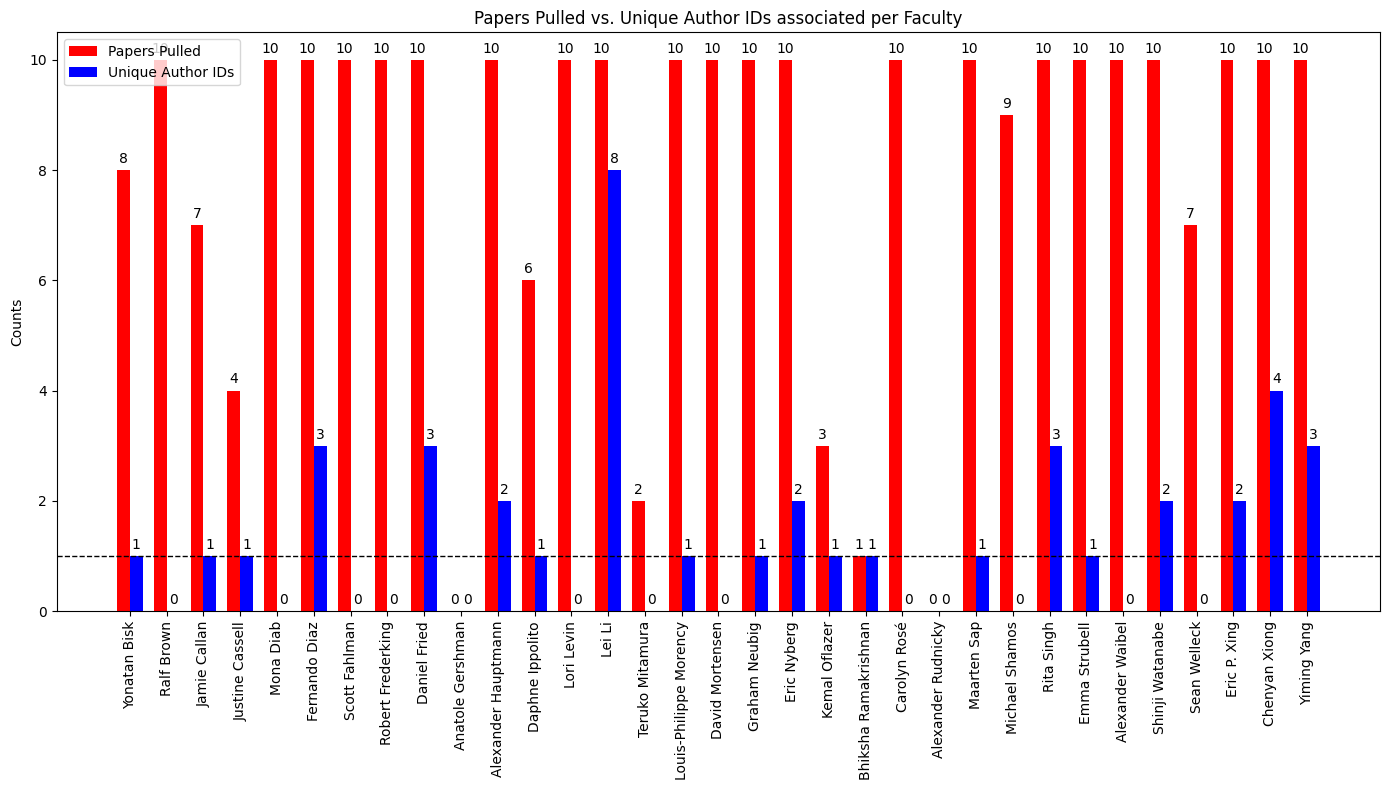

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the user
papers_by_author = {
    'Yonatan Bisk': 8, 'Ralf Brown': 10, 'Jamie Callan': 7, 'Justine Cassell': 4, 'Mona Diab': 10, 
    'Fernando Diaz': 10, 'Scott Fahlman': 10, 'Robert Frederking': 10, 'Daniel Fried': 10, 
    'Anatole Gershman': 0, 'Alexander Hauptmann': 10, 'Daphne Ippolito': 6, 'Lori Levin': 10, 
    'Lei Li': 10, 'Teruko Mitamura': 2, 'Louis-Philippe Morency': 10, 'David Mortensen': 10, 
    'Graham Neubig': 10, 'Eric Nyberg': 10, 'Kemal Oflazer': 3, 'Bhiksha Ramakrishnan': 1, 
    'Carolyn Rosé': 10, 'Alexander Rudnicky': 0, 'Maarten Sap': 10, 'Michael Shamos': 9, 
    'Rita Singh': 10, 'Emma Strubell': 10, 'Alexander Waibel': 10, 'Shinji Watanabe': 10, 
    'Sean Welleck': 7, 'Eric P. Xing': 10, 'Chenyan Xiong': 10, 'Yiming Yang': 10
}

# Unique author IDs based on the provided output
unique_ids_count = {
    'Yonatan Bisk': 1, 'Ralf Brown': 0, 'Jamie Callan': 1, 'Justine Cassell': 1, 'Mona Diab': 0,
    'Fernando Diaz': 3, 'Scott Fahlman': 0, 'Robert Frederking': 0, 'Daniel Fried': 3,
    'Anatole Gershman': 0, 'Alexander Hauptmann': 2, 'Daphne Ippolito': 1, 'Lori Levin': 0,
    'Lei Li': 8, 'Teruko Mitamura': 0, 'Louis-Philippe Morency': 1, 'David Mortensen': 0,
    'Graham Neubig': 1, 'Eric Nyberg': 2, 'Kemal Oflazer': 1, 'Bhiksha Ramakrishnan': 1,
    'Carolyn Rosé': 0, 'Alexander Rudnicky': 0, 'Maarten Sap': 1, 'Michael Shamos': 0,
    'Rita Singh': 3, 'Emma Strubell': 1, 'Alexander Waibel': 0, 'Shinji Watanabe': 2,
    'Sean Welleck': 0, 'Eric P. Xing': 2, 'Chenyan Xiong': 4, 'Yiming Yang': 3
}

authors = list(papers_by_author.keys())
papers_counts = [papers_by_author[author] for author in authors]
unique_ids_counts = [unique_ids_count[author] for author in authors]

x = np.arange(len(authors))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, papers_counts, width, label='Papers Pulled', color='red')
rects2 = ax.bar(x + width/2, unique_ids_counts, width, label='Unique Author IDs', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Papers Pulled vs. Unique Author IDs associated per Faculty')
ax.set_xticks(x)
ax.set_xticklabels(authors, rotation=90)
ax.legend()

# Drawing a dashed line at y=1 to represent the expected number of unique author IDs
plt.axhline(y=1, color='k', linestyle='--', linewidth=1, label='Expected Unique IDs')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.savefig('faculty_papers_vs_unique_ids.png', dpi=300)

plt.show()
